In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import pickle
from tensorflow.keras.utils import image_dataset_from_directory # type: ignore

In [14]:
training_set = image_dataset_from_directory(
    './train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(160, 160),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 76515 files belonging to 4 classes.


In [15]:
validation_set = image_dataset_from_directory(
    './val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(160, 160),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 21861 files belonging to 4 classes.


In [16]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [17]:
INPUT_SHAPE = (160, 160, 3)

In [18]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    #pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

C:\Users\luqma\AppData\Roaming\Python\Python313\site-packages\keras\src\applications\mobilenet_v3.py:517: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


In [19]:
mobnet.trainable = False #--used to freeze weights of this pretrained model 

In [20]:
model = tf.keras.models.Sequential()

In [21]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [22]:
model.add(mobnet)

In [23]:
model.add(tf.keras.layers.GlobalAveragePooling2D())

In [24]:
model.add(tf.keras.layers.Dense(units = 4,activation='softmax'))

In [25]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=metrics_list
)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 5, 5, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,844 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,000,196 (11.44 MB)

 Trainable params: 3,844 (15.02 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [30]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 2076s 217ms/step - accuracy: 0.8310 - f1_score: 0.6618 - loss: 0.5003 - val_accuracy: 0.8679 - val_f1_score: 0.7417 - val_loss: 0.3946
Epoch 2/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 1826s 186ms/step - accuracy: 0.8745 - f1_score: 0.7565 - loss: 0.3709 - val_accuracy: 0.8811 - val_f1_score: 0.7755 - val_loss: 0.3537
Epoch 3/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 1776s 186ms/step - accuracy: 0.8844 - f1_score: 0.7788 - loss: 0.3426 - val_accuracy: 0.8877 - val_f1_score: 0.7872 - val_loss: 0.3354
Epoch 4/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 1793s 187ms/step - accuracy: 0.8892 - f1_score: 0.7897 - loss: 0.3272 - val_accuracy: 0.8911 - val_f1_score: 0.7944 - val_loss: 0.3237
Epoch 5/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 1816s 190ms/step - accuracy: 0.8927 - f1_score: 0.7976 - loss: 0.3170 - val_accuracy: 0.8934 - val_f1_score: 0.7988 - val_loss: 0.3169
Epoch 6/10
9565/9565 ━━━━━━━━━━━━━━━━━━━━ 1836s 192ms/step - accuracy: 0.8952 - f1_score: 0.8033 - loss: 0.3095 - v

In [8]:
model.save("Trained_Model.h5")

In [31]:
model.save("Trained_Model.keras")

In [32]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [33]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.8309612274169922,
  0.874455988407135,
  0.8843756318092346,
  0.8891589641571045,
  0.89274001121521,
  0.8952100872993469,
  0.8972227573394775,
  0.8979546427726746,
  0.899601399898529,
  0.9005162119865417],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.866176  , 0.6245204 , 0.25583422, 0.9006341 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9017171 , 0.75447774, 0.437857  , 0.9319119 ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9104752 , 0.78372735, 0.4837642 , 0.937403  ], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.91391885, 0.79658407, 0.50774366, 0.94050115], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.91683954, 0.8072568 , 0.52389055, 0.94222575], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.918506  , 0.8138567 , 0.5370058 , 0.94367117], dtype=float32)>,
  <tf.Tensor: shape=(4,), dtype=float32

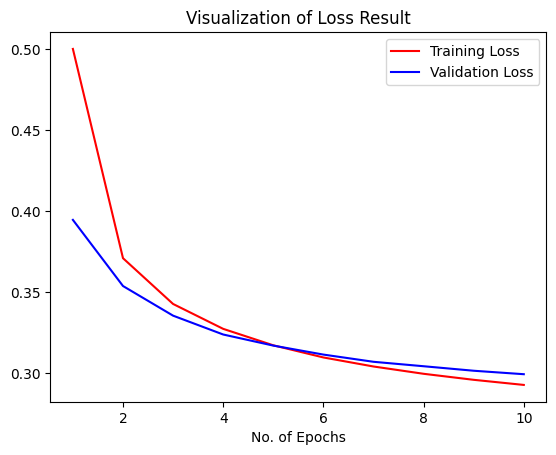

In [35]:
#Loss Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

## Model Evaluation

In [37]:
model = tf.keras.models.load_model("Trained_Model.keras")

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 5, 5, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 960)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,844 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,007,886 (11.47 MB)

 Trainable params: 3,844 (15.02 KB)

 Non-trainable params: 2,996,352 (11.43 MB)

 Optimizer params: 7,690 (30.04 KB)

In [39]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=8,
    image_size=(160, 160),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10933 files belonging to 4 classes.


In [40]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

1367/1367 ━━━━━━━━━━━━━━━━━━━━ 221s 158ms/step - accuracy: 0.8913 - f1_score: 0.7936 - loss: 0.3161


In [41]:
test_loss,test_acc,f1_score

(0.31607332825660706,
 0.8913381695747375,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9183269 , 0.8003589 , 0.51448756, 0.9412759 ], dtype=float32)>)

In [42]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [43]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(10933, 4), dtype=float32)>

In [44]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

In [45]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
predicted_categories

1367/1367 ━━━━━━━━━━━━━━━━━━━━ 178s 129ms/step


array([[9.93072212e-01, 5.07908966e-03, 1.80703180e-03, 4.17217707e-05],
       [9.97972190e-01, 1.96863711e-03, 5.90729360e-05, 6.74826139e-10],
       [9.65430677e-01, 3.33338231e-03, 3.11882142e-02, 4.77286012e-05],
       ...,
       [4.80959797e-03, 1.18948825e-01, 5.90614043e-02, 8.17180216e-01],
       [1.37409006e-04, 2.84580886e-03, 2.40893289e-02, 9.72927392e-01],
       [3.28002917e-03, 2.65807007e-02, 1.65615380e-02, 9.53577697e-01]],
      shape=(10933, 4), dtype=float32)

In [46]:
Y_pred = tf.argmax(predicted_categories, axis=1)
Y_pred

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], shape=(10933,))>

## 1. Classification Report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3746
           1       0.84      0.77      0.80      1161
           2       0.69      0.41      0.51       887
           3       0.91      0.97      0.94      5139

    accuracy                           0.89     10933
   macro avg       0.84      0.77      0.79     10933
weighted avg       0.88      0.89      0.88     10933



## 2. Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3480,   84,  109,   73],
       [  74,  892,   16,  179],
       [ 251,   29,  364,  243],
       [  28,   63,   39, 5009]])

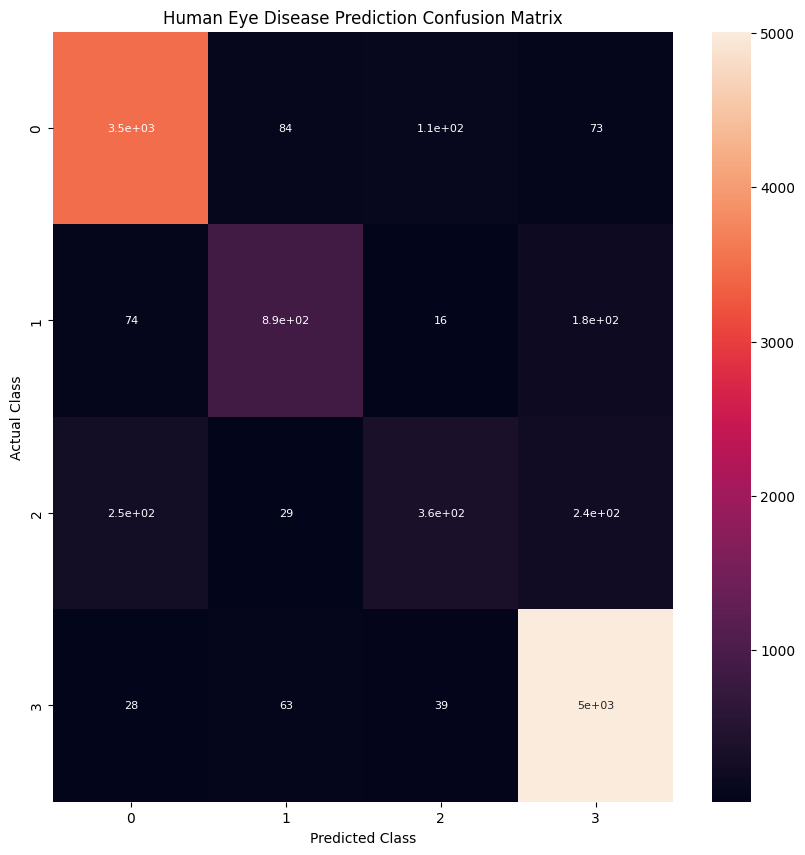

In [49]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()